In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import seaborn as sb

In [2]:
(train_x,train_y),(test_x,test_y) = tf.keras.datasets.mnist.load_data()

In [3]:
train_x_flatten = train_x.reshape(len(train_x),28*28)
test_x_flatten = test_x.reshape(len(test_x),28*28)

In [4]:
model = tf.keras.Sequential([
    layers.Dense(100,input_shape =(784,),activation= 'relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

In [5]:
model.compile(optimizer='adam',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x = train_x_flatten, y = train_y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 14ms/step - loss: 1.0203 - accuracy: 0.8489
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.4338 - accuracy: 0.9035
Epoch 3/10
1875/1875 [==============================] - 25s 14ms/step - loss: 0.2505 - accuracy: 0.9361
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1696 - accuracy: 0.9528
Epoch 5/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1525 - accuracy: 0.9579
Epoch 6/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1391 - accuracy: 0.9610
Epoch 7/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1252 - accuracy: 0.9657
Epoch 8/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1132 - accuracy: 0.9691
Epoch 9/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1067 - accuracy: 0.9703
Epoch 10/10
1875/1875 [==============================] - 25s 13m

In [6]:
acc = history.history['accuracy']
loss = history.history['loss']

Text(0.5, 1.0, 'Training Accuracy')

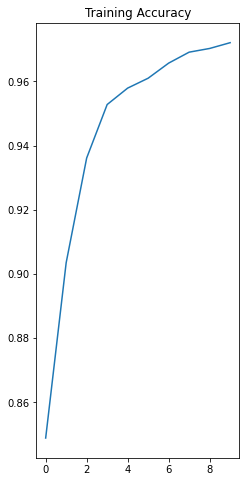

In [7]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label = 'Training accuracy')
plt.title('Training Accuracy')


Text(0.5, 1.0, 'Training Loss')

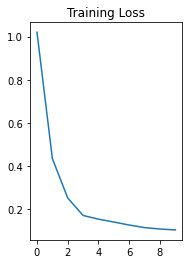

In [8]:
plt.subplot(1,2,2)
plt.plot(range(10),loss,label = 'Training loss')
plt.title('Training Loss')

In [9]:
model.evaluate(x=test_x_flatten,y = test_y)

313/313 [==============================] - 4s 10ms/step - loss: 0.1660 - accuracy: 0.9642


[0.16601186990737915, 0.9642000198364258]

Text(69.0, 0.5, 'Truth')

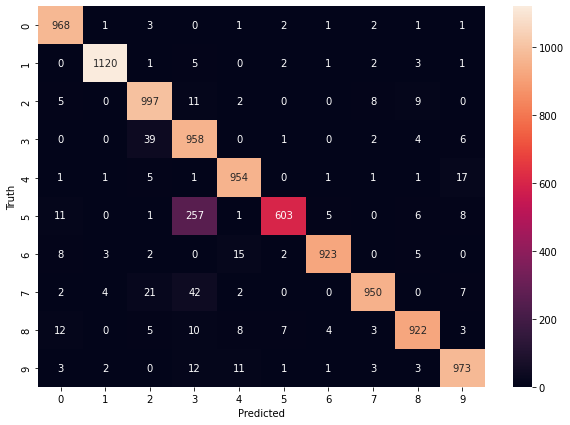

In [10]:
y_predicted = model.predict(test_x_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=test_y,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
IMAGE_SIZE = 28
x_trainr = np.array(train_x).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
x_testnr = np.array(test_x).reshape(-1,IMAGE_SIZE,IMAGE_SIZE,1)
print("Training Shape : ",x_trainr.shape)
print("Test Shape : ",x_testnr.shape)

Training Shape :  (60000, 28, 28, 1)
Test Shape :  (10000, 28, 28, 1)


In [12]:
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D

In [16]:
model1 = tf.keras.Sequential()

model1.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Conv2D(64,(3,3)))
model1.add(Activation("relu"))
model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(64))
model1.add(Activation("relu"))

model1.add(Dense(32))
model1.add(Activation("relu"))

model1.add(Dense(10))
model1.add(Activation('softmax'))

In [17]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_7 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)         

In [19]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [20]:
history1 = model1.fit(x_trainr,train_y,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 41s 16ms/step - loss: 0.3400 - accuracy: 0.9001 - val_loss: 0.1062 - val_accuracy: 0.9717
Epoch 2/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.1013 - accuracy: 0.9701 - val_loss: 0.0856 - val_accuracy: 0.9755
Epoch 3/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0793 - accuracy: 0.9761 - val_loss: 0.0723 - val_accuracy: 0.9796
Epoch 4/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0672 - accuracy: 0.9796 - val_loss: 0.1025 - val_accuracy: 0.9717
Epoch 5/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0553 - accuracy: 0.9833 - val_loss: 0.0828 - val_accuracy: 0.9765
Epoch 6/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0491 - accuracy: 0.9844 - val_loss: 0.0938 - val_accuracy: 0.9759
Epoch 7/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0394 - accuracy: 0.9881 - val_loss: 0.0715 -

In [22]:
test_loss,test_acc = model1.evaluate(x_testnr,test_y)
print("Test Loss :- ",test_loss)
print("Test Acc :- ",test_acc)

313/313 [==============================] - 5s 13ms/step - loss: 0.0705 - accuracy: 0.9821
Test Loss :-  0.07054789364337921
Test Acc :-  0.9821000099182129


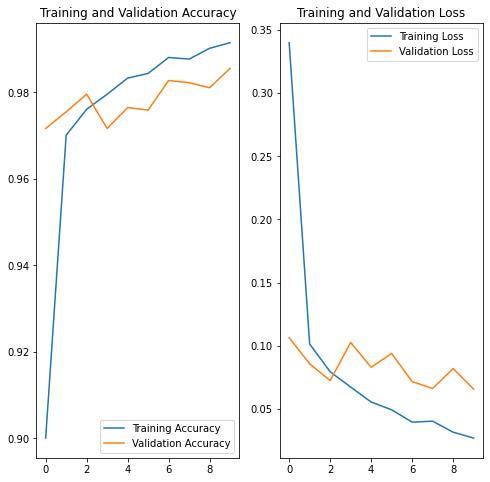

In [24]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()